In [1]:
import numpy as np
import pulp
%matplotlib inline
import matplotlib.pyplot as plt

diet = pulp.LpProblem("Diet", pulp.LpMinimize)

c = pulp.LpVariable('c', lowBound=0, cat='Continuous')
t = pulp.LpVariable('t', lowBound=0, cat='Continuous')

In [2]:
# Objective Function
diet += 5*c + 2.50*t, "P"

# Constraints
diet += 560*c + 320*t >= 300
diet += 136*c + 40*t >= 48

In [3]:
print(diet)

Diet:
MINIMIZE
5*c + 2.5*t + 0.0
SUBJECT TO
_C1: 560 c + 320 t >= 300

_C2: 136 c + 40 t >= 48

VARIABLES
c Continuous
t Continuous



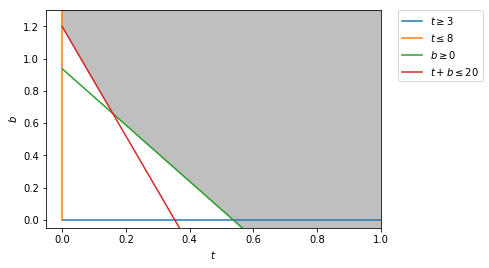

In [4]:
# Construct lines
# t >= 0
x = np.linspace(0, 5, 500)
c1 = x*0
t1 = x*0
# t + b <= 20
y1 = -560/320*x + 300/320
# t + b <= 20
y2 = -136/40*x + 48/40


# Make plot
plt.plot(x, c1, label=r'$t\geq3$')
plt.plot(t1, x, label=r'$t\leq8$')
plt.plot(x, y1, label=r'$b \geq 0$')
plt.plot(x, y2, label=r'$t + b \leq 20$')
plt.xlim((-.05, 1))
plt.ylim((-.05, 1.3))
plt.xlabel(r'$t$')
plt.ylabel(r'$b$')

# Fill feasible region
y3 = np.maximum(y1,y2)
plt.fill_between(x, y3, 100, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [5]:
diet.solve()
print(pulp.LpStatus[diet.status])

Optimal


In [6]:
for var in diet.variables():
    print(var.name + " = " + str(var.varValue))

c = 0.15909091
t = 0.65909091


In [7]:
print(pulp.value(diet.objective))

2.443181825
